#### Zbiór danych: Food Delivery Time Prediction (https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction)
#### Przewidywanie czasu dostawy jedzenia za pomocą regresji.

### 1. Analiza eksploracyjna danych

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# wczytanie pliku i usuniecie kolumny z indeksami wierszy
df = pd.read_csv('Food_Delivery_Times.csv')
print("Head: ")
display(df.head())
print()

# ramka bez kolumny order_id
d0 = df.drop(columns = ['Order_ID'])

# liczba obiektów
print("Liczba obiektów:", df.shape[0])

# liczba kategorii w kolumnie Weather
print("Liczba kategorii pogody:", df.groupby('Weather').ngroups)

# liczba kategorii w kolumnie Traffic_Level
print("Liczba kategorii natężenia ruchu:", df.groupby('Traffic_Level').ngroups)

# liczba kategorii w kolumnie Vehicle_Type
print("Liczba kategorii pojazdów:", df.groupby('Vehicle_Type').ngroups)

# liczba kategorii w kolumnie Time_of_Day
print("Liczba kategorii pory dnia:", df.groupby('Time_of_Day').ngroups, '\n')

# wypisanie statystyk opisowych dla ramki danych bez order_id 
print("Podstawowe statystyki opisowe:")
print(d0.describe())
print()

# sprawdzenie liczby brakujacych danych
print("Brakujace dane w kolumnach:")
print(d0.isnull().sum())
print()

# usuniecie obiektow z brakujacymi danymi
d1 = d0.dropna()
print("Brakujace dane w kolumnach po usunieciu:")
print(d1.isnull().sum())
print()

# liczba obiektow po usunieciu brakow
print("Liczba obiektów:", d1.shape[0])


Head: 


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68



Liczba obiektów: 1000
Liczba kategorii pogody: 5
Liczba kategorii natężenia ruchu: 3
Liczba kategorii pojazdów: 3
Liczba kategorii pory dnia: 4 

Podstawowe statystyki opisowe:
       Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
count  1000.000000           1000.000000              970.000000   
mean     10.059970             16.982000                4.579381   
std       5.696656              7.204553                2.914394   
min       0.590000              5.000000                0.000000   
25%       5.105000             11.000000                2.000000   
50%      10.190000             17.000000                5.000000   
75%      15.017500             23.000000                7.000000   
max      19.990000             29.000000                9.000000   

       Delivery_Time_min  
count        1000.000000  
mean           56.732000  
std            22.070915  
min             8.000000  
25%            41.000000  
50%            55.500000  
75%            71.00

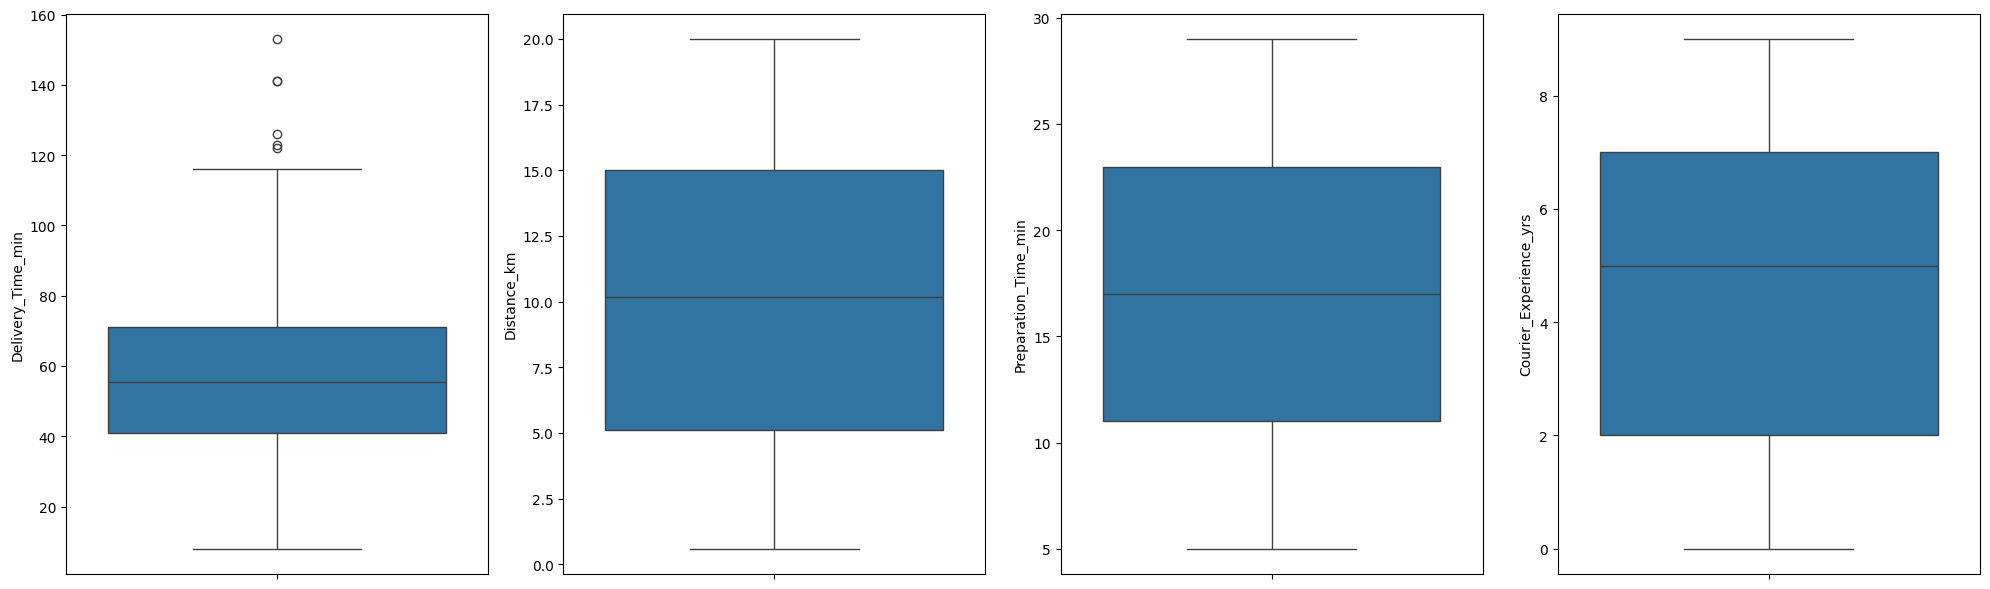

In [3]:
# wydzielenie kolumn zawierających atrybuty liczbowe
atr_num = ['Delivery_Time_min', 'Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

# boxploty atrybutów liczbowych
f, axes = plt.subplots(1, len(atr_num), figsize = (20, 6))
for i, atrybut in enumerate(atr_num):
    sns.boxplot(y = df[atrybut], ax = axes[i])
plt.tight_layout()

## Wnioski
- Czas dostawy (Delivery_Time_min) wykazuje znaczną zmienność, z medianą na poziomie około 55-60 minut. Widoczne są liczne wartości odstające powyżej 120 minut, co sugeruje, że w niektórych przypadkach dostawa trwa znacznie dłużej niż w typowych warunkach. Może to wynikać np. z nietypowych warunków ruchu drogowego lub wyjątkowo dużych odległości dostaw.

- Odległość (Distance_km) ma dość symetryczny rozkład – połowa zamówień obejmuje trasy w zakresie od około 5 do 15 km, co wskazuje na zróżnicowanie dystansów, ale bez dominacji bardzo krótkich lub bardzo długich dostaw. Brak wartości odstających sugeruje, że rozkład jest stosunkowo stabilny.

- Czas przygotowania (Preparation_Time_min) pokazuje medianę w okolicach 15-20 minut, co oznacza, że większość zamówień wymaga takiego czasu realizacji w restauracji. Nie występują wyraźne wartości odstające, co sugeruje, że proces przygotowania również jest stabilny.

- Doświadczenie kuriera (Courier_Experience_yrs) jest rozłożone równomiernie, z medianą w okolicach 4-5 lat. Zakres doświadczenia jest dość szeroki – od nowicjuszy po kurierów z ponad 8-letnim stażem, ale brak wyraźnych wartości odstających sugeruje, że jest to naturalny rozkład wśród dostawców.

Ogólna analiza wykresów pudełkowych wskazuje, że czynniki takie jak odległość i czas przygotowania są względnie stabilne, natomiast czas dostawy może być silnie zróżnicowany, szczególnie w przypadku wartości odstających.

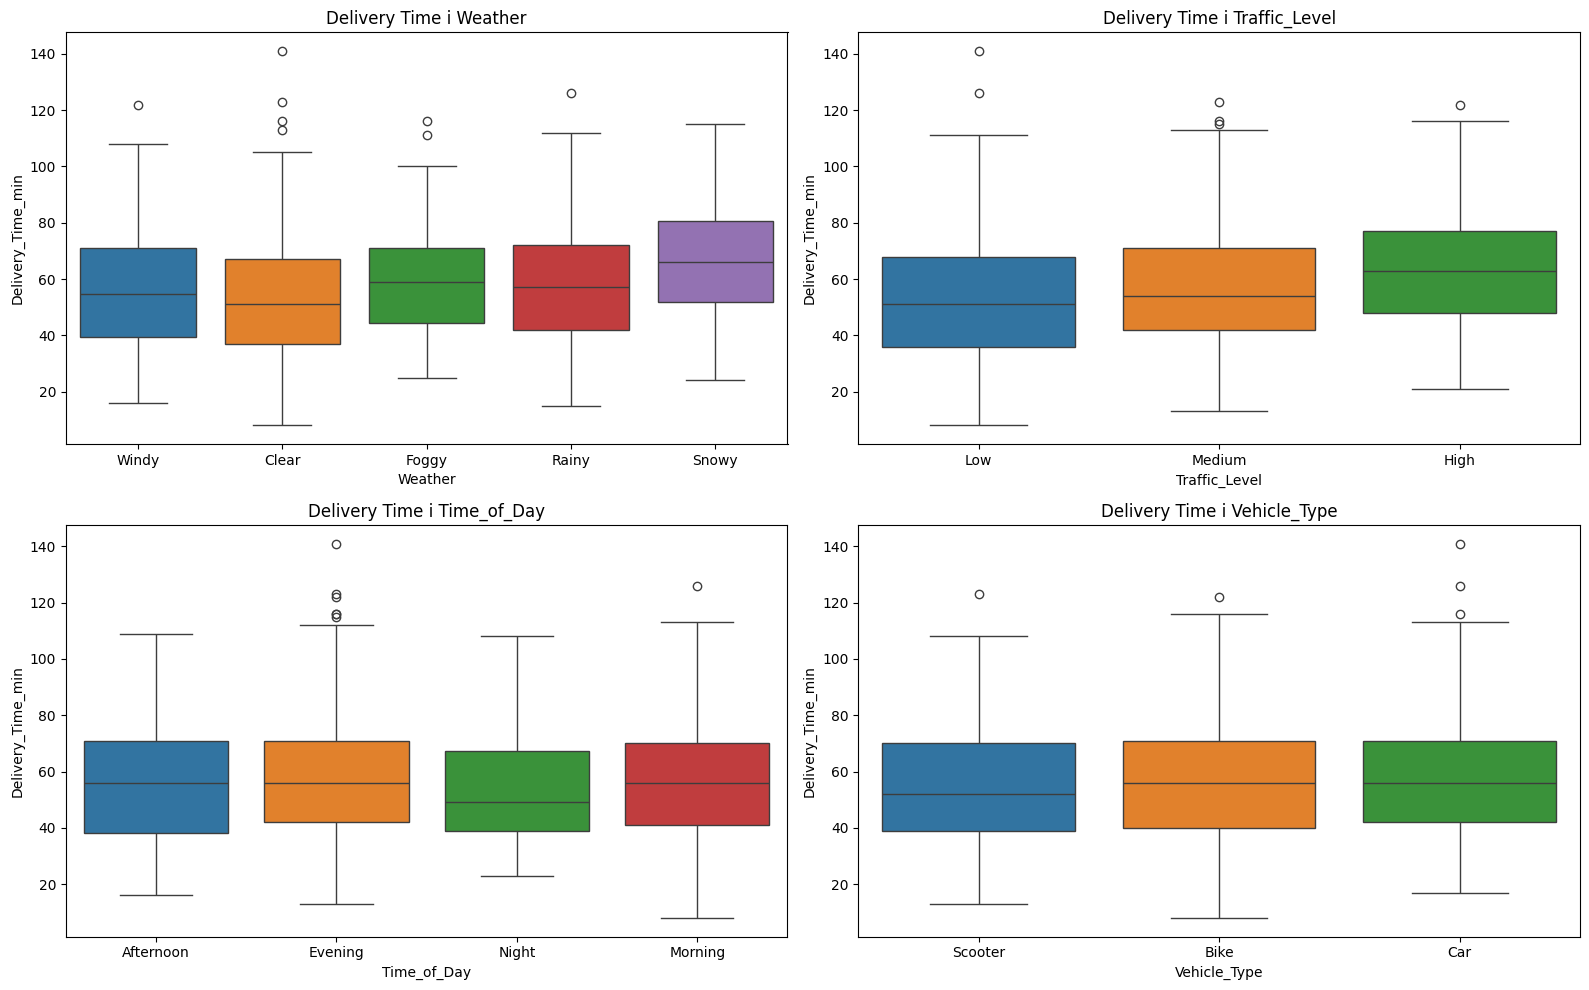

In [4]:
# wydzielenie kolumn zawierających atrybuty kategoryczne
atr_kat = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

# boxploty zmiennośći czasu dostawy w zależności od poszczególnego atrybutu kategorycznego
f, axes = plt.subplots(2, 2, figsize = (16, 10))
axes = axes.flatten()
for i, atrybut in enumerate(atr_kat):
    sns.boxplot(d1, x = atrybut, y = 'Delivery_Time_min', hue = atrybut, ax = axes[i])
    axes[i].set_title(f"Delivery Time i {atrybut}")
plt.tight_layout()
plt.show()

## Wnioski

- Pogoda (weather): Mediana czasu dostawy rośnie wraz z trudniejszymi warunkami i jest najwyższa dla "Snowy", co sugeruje, że śnieg znacząco wpływa na wydłużenie czasu dostawy. Mimo że "Clear" ma najmniejszą medianę i niewielki rozstęp kwartylowy, warto zwrócić uwagę na stosunkowo liczne wartości odstające, które mogą wskazywać na inne nietypowe sytuacje.

- Natężenie ruchu (traffic_level): Czas dostawy rośnie wręcz liniowo wraz ze zwiększającym się natężeniem ruchu, co wydaje się logicznie jako jeden z kluczowych atrybutów.

- Pora dnia (time_of_day): Mediana czasu dostawy nie zmienia się istotnie między różnymi porami dnia. Dla pory "Morning" rozstęp kwartylowy jest większy, co wskazuje na większą zmienność w czasach dostawy. W porze "Evening" odnotowano większą liczbę wartości odstających, co może wskazywać na częstsze występowanie sytuacji wyjątkowych. W porze "Night" mediana jest najmiejsza, na co prawdopodobnie wpływa mniejszy ruch uliczny nocą.

- Typ pojazd (vehicle_type): Najkrótsze mediany oraz najmniejszy zakres wartości (zarówno kwartylowych, jak i nieodstających) zaobserwowano dla pojazdów typu "Scooter", co wskazuje na ich większą efektywność w dostawach. Pojazdy "Car" mają największa ilość przypadków odstających.

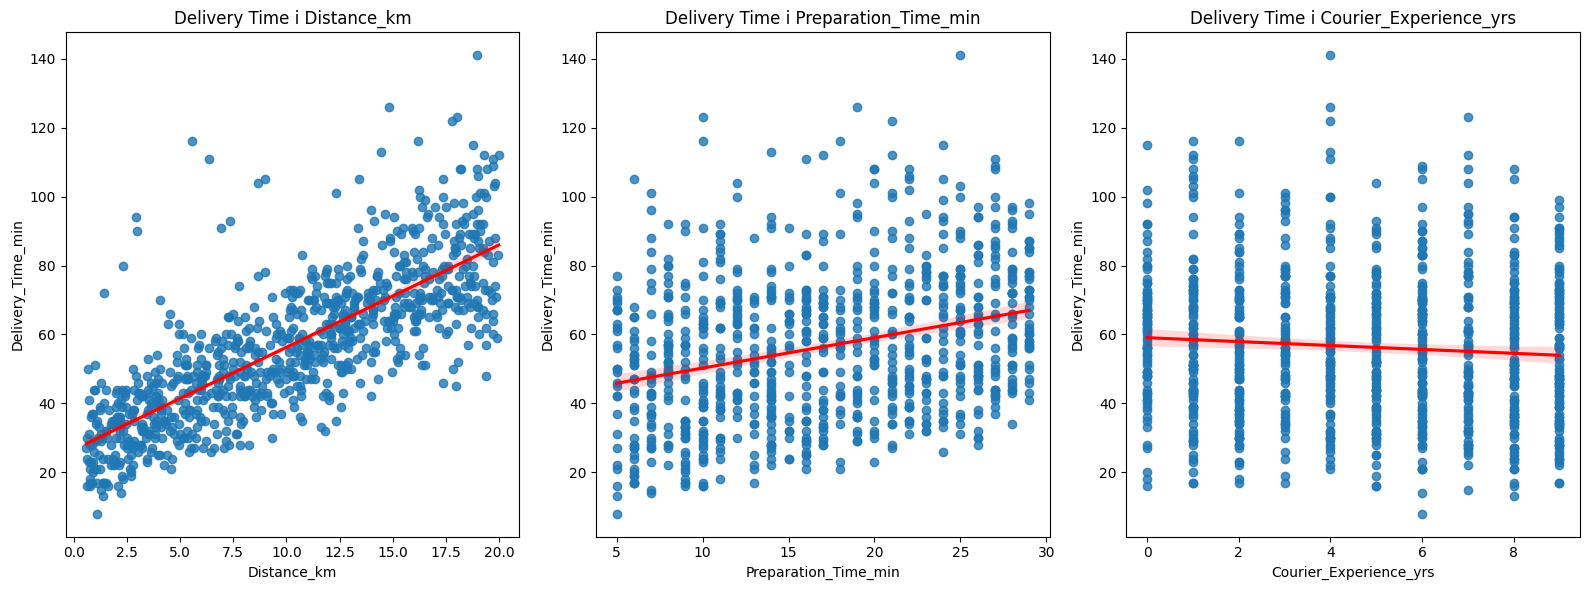

In [5]:
# atr_num bez czasu dostawy
atr_num = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

# wykresy zależności czasu dostawy od innych atrybutów liczbowych
f, axes = plt.subplots(1, len(atr_num), figsize=(16, 6))
for i, atrybut in enumerate(atr_num):
    sns.regplot(data = d1, x = atrybut, y = 'Delivery_Time_min', ax = axes[i], scatter = True, line_kws = {'color': 'red'})
    axes[i].set_title(f"Delivery Time i {atrybut}")
plt.tight_layout()
plt.show()

## Wnioski

- Odległość: Widać wyraźną liniową zależność między odległością a czasem dostawy. Dłuższa odległość oznacza dłuższy czas dostawy. Większość danych układa się wzdłuż linii rosnącej, co wskazuje na bezpośredni związek między tymi zmiennymi. Odstające przypadki (czasy dostawy powyżej 100 minut) występują na większych dystansach (głównie > 10 km), co sugeruje, że mogą być związane z dodatkowymi czynnikami (np. Traffic_Level, Weather).

- Czas przygotowania: Nie ma wyraźnej zależności między czasem przygotowania a czasem dostawy. Punkty są rozproszone na całej osi Y, niezależnie od wartości osi X. To wskazuje, że czas przygotowania zamówienia nie wpływa bezpośrednio na czas dostawy.

- Doświadczenie kuriera: Brak wyraźnej zależności między doświadczeniem kuriera a czasem dostawy. Punkty są rozproszone równomiernie na całej osi Y. Zarówno nowi kurierzy (0-1 lat doświadczenia), jak i bardziej doświadczeni (5-9 lat) mają podobne czasy dostawy. Odstające przypadki pojawiają się niezależnie od poziomu doświadczenia kuriera, co wskazuje, że brak dłuższego doświadczenia nie jest głównym czynnikiem wpływającym na nietypowo długie dostawy.

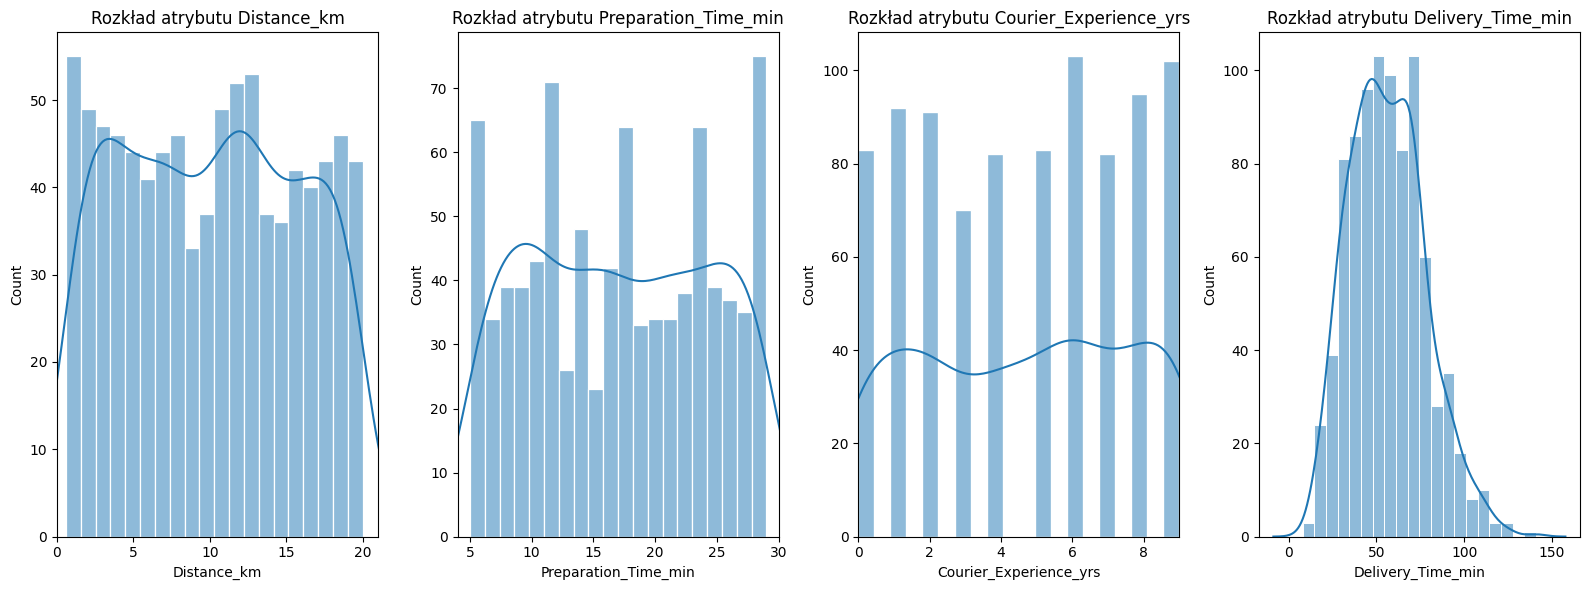

In [6]:
# wszystkie atrybuty liczbowe
atr_num += ['Delivery_Time_min']

# wykresy dystrybucji atrybutów liczbowych
f, axes = plt.subplots(1, len(atr_num), figsize=(16, 6))
for i, atrybut in enumerate(atr_num):
    if atrybut == 'Distance_km':
        axes[i].set_xlim(0, 21)
    if atrybut == 'Preparation_Time_min':
        axes[i].set_xlim(4, 30)
    if atrybut == 'Courier_Experience_yrs':
        axes[i].set_xlim(0, 9)
    sns.histplot(d1[atrybut], bins = 20, edgecolor = 'white', kde = True, kde_kws = dict(cut = 3), ax = axes[i])
    axes[i].set_title(f"Rozkład atrybutu {atrybut}", fontsize = 12)
plt.tight_layout()
plt.show()

## Wnioski

- Czas dostawy: Rozkład jest asymetryczny prawostronny – większość dostaw odbywa się w przedziale 40-70 minut. Występują wartości skrajne powyżej 100 minut, które mogą wskazywać na długodystansowe dostawy lub trudne warunki.

- Odległość: Rozkład jest równomierny, wskazuje na zróżnicowane trasy, ale brak widocznych ekstremalnie długich dystansów.

- Czas przygotowania: Rozkład jest lekko nieregularny, z kilkoma wyraźnymi szczytami (np. przy 10, 20 i 25 minutach). Wskazuje na standardowe czasy przygotowania zamówień, które mogą zależeć od typu zamówienia.

- Doświadczenie kuriera: Rozkład jest niemal równomierny, z lekkimi szczytami przy 1-2 i 8-9 latach doświadczenia.

Czas dostawy głównym czynnikiem wpływającym na zmienność w danych. Pozostałe dane mają bardziej równomierne rozkłady i prawdopodobnie mniejszy wpływ na odstające przypadki.

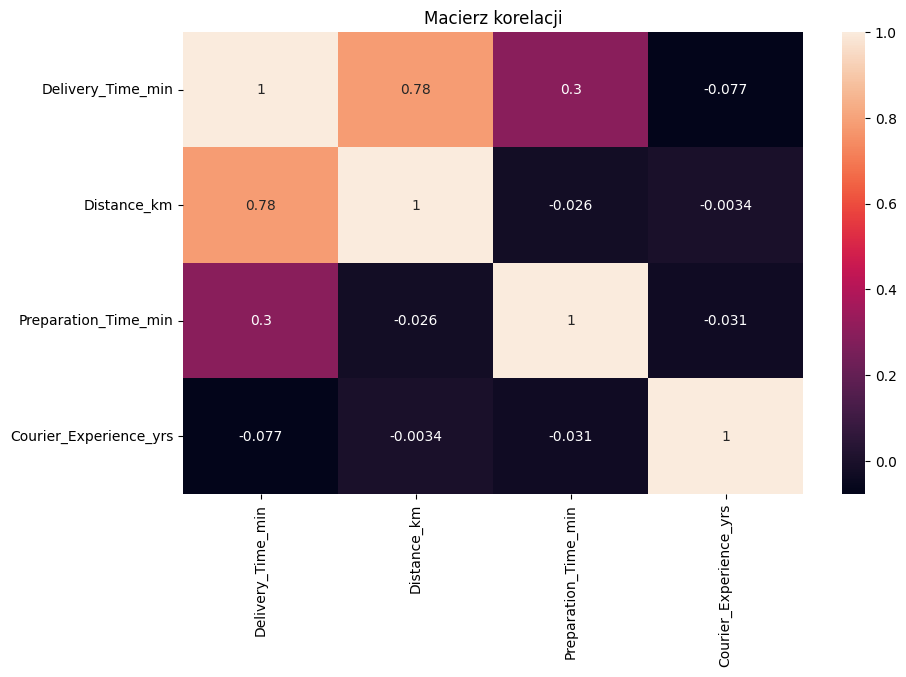

In [7]:
# macierz korelacji atrybutów liczbowych
plt.figure(figsize = (10, 6))
macierz_korelacji = d1[['Delivery_Time_min', 'Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']].corr()
sns.heatmap(macierz_korelacji, annot = True)
plt.title('Macierz korelacji')
plt.show()

In [8]:
#d1 = d1.drop(columns = ['Courier_Experience_yrs']) - po analizie wyników zrezygnowaliśmy z usunięcia kolumny doświadczenia kuriera
print(d1.columns)

Index(['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')


Bazując na poprzednich analizach wykresów oraz powyższej macierzy korelacji widzimy, że Doświadczenie kuriera (Courier_Experience) nie ma dużego związku z czasem dostawy, dlatego pojawił się pomysł odrzucenia go z czynników wpływających na wynik regresji. Używanie niekorelujących atrybutów może wpływać negatywnie wprowadzając szum, zwiększając ryzyko przeuczenia oraz obniżając efektywność predykcji, jednak po przeanalizowaniu obu przypadków (z doświadczeniem kuriera i bez) wszystkie modele regresyjne zwróciły delikatnie dokładniejszą wartość, gdy uwzględniliśmy ten atrybut. Gdyby model operował na bardzo dużej ilości danych wtedy odrobinę dokładniejszy wynik w stosunku do dodatkowej złożoności obliczeniowej nie byłby korzystny, jednak w tym wypadku Doświadczenie Kuriera pozostaje jako w atrybut. 

## 2. Przypisanie wartości liczbowych (boolean) poszczególnym kategoriom atrybutów

In [9]:
# kodowanie atrybutów kategorycznych na liczbowe
d2 = pd.get_dummies(d1, columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'])
print("Ramka z danymi kategorycznymi po przypisaniu im wartości boolean (liczbowych w kontekscie regresji): ")
display(d2.head())

Ramka z danymi kategorycznymi po przypisaniu im wartości boolean (liczbowych w kontekscie regresji): 


,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,43,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True
1,16.42,20,2.0,84,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False
2,9.52,28,1.0,59,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True
3,7.44,5,1.0,37,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True
4,19.03,16,5.0,68,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False


Przekształcamy atrybuty kategoryczne (Weather, Traffic_Level, Time_of_Day, Vehicle_Type) na wartości liczbowe przy użyciu techniki one-hot encoding (pd.get_dummies). W efekcie każda kategoria w danej kolumnie zostaje zamieniona na nową kolumnę, w której wartości przyjmują 0 lub 1, wskazując obecność danej cechy w wierszu.

Takie przekształcenie jest kluczowe w kontekście regresji, ponieważ modele matematyczne wymagają wartości liczbowych, a surowe dane tekstowe nie mogą być bezpośrednio używane. One-hot encoding pozwala zachować unikalność kategorii bez wprowadzania sztucznej hierarchii między nimi, co jest szczególnie ważne w przypadku zmiennych kategorycznych (np. typ pojazdu czy pogoda), gdzie wartości nie mają naturalnego porządku.

Ostatecznie uzyskujemy w pełni numeryczną ramkę danych, która jest gotowa do wykorzystania w modelach regresyjnych.

## 3. Oddzielenie atrybutu decyzyjnego od atrybutów opisowych

In [10]:
# wszystkie kolumny oprócz czasu dostawy
x = d2.drop(columns = ['Delivery_Time_min'])
# tylko kolumna czasu dostawy
y = (d2['Delivery_Time_min']).to_frame()

print("Ramka atrybutów opisowych:")
display(x.head())
print()

print("Ramka atrybutu decyzyjnego (czas dostawy):")
display(y.head())

Ramka atrybutów opisowych:


,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True
1,16.42,20,2.0,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False
2,9.52,28,1.0,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True
3,7.44,5,1.0,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True
4,19.03,16,5.0,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False



Ramka atrybutu decyzyjnego (czas dostawy):


,Delivery_Time_min
0,43
1,84
2,59
3,37
4,68


Oddzielamy atrybuty opisowe (cechy wejściowe) od atrybutu decyzyjnego (Delivery_Time_min), który jest naszą zmienną docelową w modelu regresji. Dzięki temu możemy trenować model na danych wejściowych (x), jednocześnie mając czas dostawy (y) jako zmienną do przewidywania.

## 4. Podział na zbiór uczący i testowy

In [11]:
from sklearn.model_selection import train_test_split

# podział 30% - zbiór testowy/70% - zbiór uczący 
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)
print(f'Rozmiar zbioru uczącego (rozmiar, kolumny): {x_ucz.shape}\nRozmiar zbioru testowego: {x_test.shape}')

Rozmiar zbioru uczącego (rozmiar, kolumny): (618, 18)
Rozmiar zbioru testowego: (265, 18)


Dokonujemy podziału danych na zbiór uczący (70%) i zbiór testowy (30%), możliwa jest również proporcja 80/20, jednak w naszym modelu przy średniej ilości danych zdecydowaliśmy się na proporcje 70/30, ponieważ większy zbiór testowy pozwala na bardziej wiarygodną ocenę modelu, redukuje ryzyko przeuczenia i zapewnia lepszą generalizację na nowe dane. Dzięki temu model jest testowany na większej liczbie przypadków, co zwiększa stabilność metryk oceny i lepiej odwzorowuje rzeczywiste warunki dostaw.

Ustawienie (random_state=7) zapewnia, że podział będzie reprodukowalny, co oznacza, że przy każdym uruchomieniu kodu wynik będzie taki sam.

## 5. Model: Regresja liniowa

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# tworzenie modelu regresji liniowej
rl = LinearRegression()
# uczenie modelu
rl.fit(x_ucz, y_ucz)

# predykcja na podstawie uczenia 
y_przewidywane_rl = rl.predict(x_test)

# błąd średniokwadratowy
mse_rl = mean_squared_error(y_test, y_przewidywane_rl)

print(f"Błąd średniokwadratowy dla modelu regresji liniowej: {mse_rl:.3f}")
print()

Błąd średniokwadratowy dla modelu regresji liniowej: 120.340



Tworzymy model regresji liniowej i trenujemy go na zbiorze uczącym, aby nauczył się zależności między zmiennymi. Następnie dokonujemy predykcji na zbiorze testowym i obliczamy błąd średniokwadratowy (MSE), który mierzy różnicę między wartościami rzeczywistymi, a przewidywanymi, wskazując na jakość dopasowania modelu.

## 6. Model: Drzewo regresyjne

In [13]:
from sklearn.tree import DecisionTreeRegressor

d = DecisionTreeRegressor(max_depth = 4)
d.fit(x_ucz, y_ucz)

y_przewidywane_d = d.predict(x_test)

mse_d = mean_squared_error(y_test, y_przewidywane_d)

print(f"Błąd średniokwadratowy dla modelu drzewa regresyjnego: {mse_d:.3f}")
print()

Błąd średniokwadratowy dla modelu drzewa regresyjnego: 177.792



Tworzymy drzewo regresyjne o maksymalnej głębokości 4, co pozwala ograniczyć jego złożoność i zapobiega przeuczeniu. Tak samo jak w poprzednim modelu uczymy go na danych treningowych, a następnie dokonujemy predykcji i oceniamy jakość modelu za pomocą błędu średniokwadratowego.

## 7. Model: Ridge

In [14]:
from sklearn.linear_model import Ridge

r = Ridge()
r.fit(x_ucz, y_ucz)
y_przewidywane_r = r.predict(x_test)

mse_r = mean_squared_error(y_test, y_przewidywane_r)

print(f"Błąd średniokwadratowy dla modelu Ridge: {mse_r:.3f}")
print()

Błąd średniokwadratowy dla modelu Ridge: 120.380



Tworzymy model Regresji Ridge, który jest uczony, dokonuje predykcji, a jego skuteczność tak samo oceniamy za pomocą błędu średniokwadratowego (MSE).

## 8. Porównanie modeli

In [15]:
print(f"Błąd średniokwadratowy dla modelu regresji liniowej: {mse_rl:.3f}")
print(f"Błąd średniokwadratowy dla modelu drzewa regresyjnego: {mse_d:.3f}")
print(f"Błąd średniokwadratowy dla modelu Ridge: {mse_r:.3f}")

Błąd średniokwadratowy dla modelu regresji liniowej: 120.340
Błąd średniokwadratowy dla modelu drzewa regresyjnego: 177.792
Błąd średniokwadratowy dla modelu Ridge: 120.380


## Wnioski
Regresja liniowa oraz Ridge okazały się najlepszymi modelami w analizie, osiągając najniższy błąd średniokwadratowy (MSE ~120.34), co oznacza, że najlepiej przewidują czas dostawy. Ridge nie wprowadził istotnej poprawy względem klasycznej regresji liniowej, co sugeruje, że regularyzacja nie była konieczna – dane nie wykazują silnej współliniowości, a model liniowy dobrze uchwycił zależności w zbiorze.

Drzewo regresyjne osiągnęło wyraźnie gorszy wynik (MSE = 177.792). Dane mają dosyć silne zależności liniowe, co sprawia, że drzewo regresyjne, które działa skokowo i lepiej sprawdza się w modelowaniu nieliniowych zależności, nie jest optymalnym wyborem dla tego przypadku. Dodatkowo, model drzewa może być bardziej podatny na szum w danych, co zwiększa błąd na zbiorze testowym.

Podsumowując, regresja liniowa i Ridge zapewniają bardziej stabilne i dokładne przewidywania, podczas gdy drzewo regresyjne w tej analizie nie sprawdziło się tak dobrze, prawdopodobnie ze względu na charakter danych, które lepiej opisuje model liniowy.

## 9. Przewidywanie czasu dostawy na podstawie atrybutów opisowych

In [16]:
# przykładowe zamówienie (ramka testowa x)
dostawa = {
    'Distance_km': [8],
    'Preparation_Time_min': [20],
    'Courier_Experience_yrs': [2],
    'Weather_Clear':[0],
    'Weather_Foggy':[0],
    'Weather_Rainy':[0],
    'Weather_Snowy':[0],
    'Weather_Windy':[1],
    'Traffic_Level_High':[1],
    'Traffic_Level_Low':[0],
    'Traffic_Level_Medium':[0],
    'Time_of_Day_Afternoon':[1],
    'Time_of_Day_Evening':[0],
    'Time_of_Day_Morning':[0],
    'Time_of_Day_Night':[0],
    'Vehicle_Type_Bike':[0],
    'Vehicle_Type_Car':[0],
    'Vehicle_Type_Scooter':[1],
}

df_przewidywanie = pd.DataFrame(dostawa)

# przewidywanie czasu dostawy w oparciu o każdy z 3 modeli
rl_p = rl.predict(df_przewidywanie)
d_p = d.predict(df_przewidywanie)
r_p = r.predict(df_przewidywanie)

print(f"Czas dostawy przewidywany przez model regresji liniowej: {rl_p[0][0]:.2f} min")
print(f"Czas dostawy przewidywany przez model drzewa regresyjnego: {d_p[0]:.2f} min")
print(f"Czas dostawy przewidywany przez model Ridge: {r_p[0]:.2f} min")

Czas dostawy przewidywany przez model regresji liniowej: 59.77 min
Czas dostawy przewidywany przez model drzewa regresyjnego: 58.54 min
Czas dostawy przewidywany przez model Ridge: 59.77 min


Aby przetestować modele w praktyce tworzymy przykładowe zamówienie, czyli pojedynczy zestaw danych wejściowych w postaci ramki testowej (df_przewidywanie). Wprowadzone wartości opisują konkretne warunki dostawy, m.in.:


- Odległość: 8 km
- Czas przygotowania zamówienia: 20 minut
- Doświadczenie kuriera: 2 lata
- Warunki pogodowe: Wietrznie (Weather_Windy=1, pozostałe 0)
- Natężenie ruchu: Wysokie (Traffic_Level_High=1, pozostałe 0)
- Pora dnia: Popołudnie (Time_of_Day_Afternoon=1, pozostałe 0)
- Środek transportu: Skuter (Vehicle_Type_Scooter=1, pozostałe 0)


Następnie, na podstawie tej próbki, trzy modele regresyjne przewidują czas dostawy.
Wyniki są zaokrąglane do dwóch miejsc po przecinku i wypisywane na ekran. Dzięki temu możemy porównać, jak różne modele przewidują czas dostawy w tych samych warunkach i ocenić ich zgodność. Identyczny wynik dla regresji liniowej i Ridge potwierdza w praktyce ich zbliżoną dokładność (na podstawie MSE), dlatego wynik tych 2 modeli powinien być najbliższy rzeczywistości.